# Def Section

In [20]:
from pandas.core.indexes.base import trim_front
#import pandas as pd


"""# Cleaning broken instances #"""
def original_data_cleaning(listofInstance,ctag1,ctag2,wtag):
    
    indx = 0
    for i in listofInstance[ctag1]:
        if  wtag in i:
            listofInstance = listofInstance.drop(listofInstance.index[indx])
        else:
            indx = indx + 1
        
    listofInstance = listofInstance.loc[(listofInstance[ctag2].isnull() == False)]
    listofInstance = listofInstance.reset_index(drop=True)
    
    return listofInstance

    
"""# Cleaning broken instances Test#"""
def original_data_cleaning_test(listofInstance,ctag1,ctag2,wtag):
    
    indx = 0

    for i in listofInstance[ctag1]:
      if wtag in i:
          listofInstance = listofInstance.drop(listofInstance.index[indx])
      else:
          indx = indx + 1
    listofInstance = listofInstance.loc[(listofInstance[ctag2].isnull() == False)]
    listofInstance = listofInstance.reset_index(drop=True)

    return listofInstance


"""# Cleaning sentences #"""

#Pre-process sentences
import nltk
import string
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

def Preprocess_listofSentence(listofSentence):
 preprocess_list = []
 for sentence in listofSentence :
  sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

  #lowercase
  tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_punct.lower())
  #tokenize
  tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_punct)
  # remove stopwords
  words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]      
  # lemmatize
  words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)         
  #put the words together in a list
  sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or w.isalpha())

  preprocess_list.append(sentence_clean)

 return preprocess_list


"""# Feature 1 extraction - "word_count_dif", the difference between number of words in sentence1 vs. sentence2 #"""

def FeatureExtraction_WordCount(listofSentence1,listofSentence2):

    words_count_dif = []
    for i in range(len(listofSentence1)):
        words_count_dif.append(abs(len(listofSentence1[i])-len(listofSentence2[i]))/(len(listofSentence1[i])+len(listofSentence2[i])))
 
    return words_count_dif


"""# Feature 2 extraction - "word_overlap", number of the same words in sentence1 and sentence2 #"""
def FeatureExtraction_WordOverlap(listofSentence1,listofSentence2):

    same_words = []
    for i in range(len(listofSentence1)):
        same_words.append(len(list(set(listofSentence1[i])&set(listofSentence2[i])))/(len(listofSentence1[i])+len(listofSentence2[i]))) 
    
    return same_words


"""# Feature 3 extraction - "word_union", number of unique words in sentence1 and sentence2 #"""
def FeatureExtraction_WordUnion(listofSentence1,listofSentence2):

    word_union = [] 
    for i in range(len(listofSentence1)):
        word_union.append(len(list(set(listofSentence1[i]) | set(listofSentence2[i])))/(len(listofSentence1[i])+len(listofSentence2[i])))

    return word_union


"""# Feature 4 extraction - "three_gram_overlap", number of same sequence of three words in sentence1 and sentence2 #"""
#import re
from nltk.util import ngrams

def FeatureExtraction_3gramOverlap(listofSentence1,listofSentence2):
    
    tokenize_sentence1 = []
    tokenize_sentence2 = []
    for i in range(len(listofSentence1)):
      tokenize_sentence1.append(nltk.tokenize.word_tokenize(listofSentence1[i]))
      tokenize_sentence2.append(nltk.tokenize.word_tokenize(listofSentence2[i]))
    
    three_gram_sen1 = []
    three_gram_sen2 = []
    for i in range(len(listofSentence1)):
        three_gram_sen1.append(list(ngrams(tokenize_sentence1[i], 3)))
        three_gram_sen2.append(list(ngrams(tokenize_sentence2[i], 3)))

    same_ngrams = []
    for i in range(len(listofSentence1)):
        same_ngrams.append(len(list(set(three_gram_sen1[i]) & set(three_gram_sen2[i]))) /(len(set(three_gram_sen1[i]))+len(set(three_gram_sen2[i]))))
    
    return same_ngrams


"""# Feature 5 extraction - "three_gram_union" #"""
def FeatureExtraction_3gramUnion(listofSentence1,listofSentence2):

    tokenize_sentence1 = []
    tokenize_sentence2 = []
    for i in range(len(listofSentence1)):
      tokenize_sentence1.append(nltk.tokenize.word_tokenize(listofSentence1[i]))
      tokenize_sentence2.append(nltk.tokenize.word_tokenize(listofSentence2[i]))

    three_gram_sen1 = []
    three_gram_sen2 = []
    for i in range(len(listofSentence1)):
        three_gram_sen1.append(list(ngrams(listofSentence1[i], 3)))
        three_gram_sen2.append(list(ngrams(listofSentence2[i], 3)))

    union_ngrams = []
    for i in range(len(listofSentence1)):
        union_ngrams.append(len(list(set(three_gram_sen1[i]) | set(three_gram_sen2[i])))/(len(set(three_gram_sen1[i]))+len(set(three_gram_sen2[i]))))

    return union_ngrams


"""# Feature 6 extraction - "two_gram_overlap" #"""
def FeatureExtraction_2gramOverlap(listofSentence1,listofSentence2):
    tokenize_sentence1 = []
    tokenize_sentence2 = []
    for i in range(len(listofSentence1)):
      tokenize_sentence1.append(nltk.tokenize.word_tokenize(listofSentence1[i]))
      tokenize_sentence2.append(nltk.tokenize.word_tokenize(listofSentence2[i]))

    two_gram_sen1 = []
    two_gram_sen2 = []
    for i in range(len(listofSentence1)):
        two_gram_sen1.append(list(ngrams(listofSentence1[i], 2)))
        two_gram_sen2.append(list(ngrams(listofSentence2[i], 2)))

    same_ngrams = []
    for i in range(len(listofSentence1)):
        same_ngrams.append(len(list(set(two_gram_sen1[i]) & set(two_gram_sen2[i])))/(len(set(two_gram_sen1[i]))+len(set(two_gram_sen2[i]))))
    
    return same_ngrams


"""# Feature 7 extraction - "two_gram_union" #"""
def FeatureExtraction_2gramUnion(listofSentence1,listofSentence2):
    tokenize_sentence1 = []
    tokenize_sentence2 = []
    for i in range(len(listofSentence1)):
      tokenize_sentence1.append(nltk.tokenize.word_tokenize(listofSentence1[i]))
      tokenize_sentence2.append(nltk.tokenize.word_tokenize(listofSentence2[i]))
      
    two_gram_sen1 = []
    two_gram_sen2 = []
    for i in range(len(listofSentence1)):
        two_gram_sen1.append(list(ngrams(listofSentence1[i], 2)))
        two_gram_sen2.append(list(ngrams(listofSentence2[i], 2)))

    union_ngrams = []
    for i in range(len(listofSentence1)):
        union_ngrams.append(len(list(set(two_gram_sen1[i]) | set(two_gram_sen2[i])))/(len(set(two_gram_sen1[i]))+len(set(two_gram_sen2[i]))))

    return union_ngrams


"""# Feature 8 extraction - "num_overlap", number of the same numbers in sentence1 and sentence2 #"""
import re
def FeatureExtraction_NumOverlap(listofSentence1,listofSentence2):

# step 1 - extract numbers including float and persentage
# creating a patern for step 1 
    numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?' 
# applying filter to create a list of found numbers
    num_filter_patern = re.compile(numeric_const_pattern, re.VERBOSE)

# step 2 - count how many numbers are matching    
    same_nums = []
    for i in range(len(listofSentence1)):
        total_num_temp = len(list(set(num_filter_patern.findall(listofSentence1[i])) | set(num_filter_patern.findall(listofSentence2[i]))))
        if total_num_temp == 0:
          same_nums.append(float(0))
        else:
          same_num_temp = len(list(set(num_filter_patern.findall(listofSentence1[i])) & set(num_filter_patern.findall(listofSentence2[i])))) 
          same_nums.append(float(same_num_temp/total_num_temp))
#        same_nums.append(len(list(set(num_filter_patern.findall(listofSentence1[i])) & set(num_filter_patern.findall(listofSentence2[i])))))
    
    return same_nums


"""# Feature 9 extraction - "num_capitalized_letters" #""" 
def FeatureExtraction_CapitalLetters(listofSentence1,listofSentence2):
    import re
    import nltk
    nltk.download('stopwords')

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords = [each_string.capitalize() for each_string in stopwords]

    cap_words_sen1 = []
    for i in range(len(listofSentence1)):
      res1 = re.findall('([A-Z][a-z]+)', listofSentence1[i])
      words_w_stopwords = [i for i in res1 if i not in stopwords] 
      cap_words_sen1.append(words_w_stopwords)
    
    cap_words_sen2 = []
    for i in range(len(listofSentence2)):
      res2 = re.findall('([A-Z][a-z]+)', listofSentence2[i])
      words_w_stopwords = [i for i in res2 if i not in stopwords] 
      cap_words_sen2.append(words_w_stopwords)

    num_capitalized_letters = []
    for i in range(len(listofSentence1)):
      total_num_temp = len(list(set(cap_words_sen1[i]) | set(cap_words_sen2[i])))
      if total_num_temp == 0:
        num_capitalized_letters.append(float(0))
      else:
        num_capitalized_letters.append(float(len(list(set(cap_words_sen1[i]) & set(cap_words_sen2[i])))/total_num_temp))

    return num_capitalized_letters

"""# Feature 10 extraction - "cosine_sim" #""" #NOT in USE YET
def FeatureExtraction_CosineSim(listofSentence1,listofSentence2):
    #turn sentences into vectors
    from collections import Counter
    import math
    import re 

    WORD = re.compile(r"\w+")

    def text_to_vector(text):
      words = WORD.findall(text)
      return Counter(words)

    cos_score = []
    for i in range(len(listofSentence1)):
      vector1 = text_to_vector(listofSentence1[i])
      vector2 = text_to_vector(listofSentence2[i])

      intersection = set(vector1.keys()) & set(vector2.keys())
      numerator = sum([vector1[x] * vector2[x] for x in intersection])

      sum1 = sum([vector1[x] ** 2 for x in list(vector1.keys())])
      sum2 = sum([vector2[x] ** 2 for x in list(vector2.keys())])
      denominator = math.sqrt(sum1) * math.sqrt(sum2)

      if not denominator:
          cosine = 0.0
      else:
          cosine = float(numerator) / denominator

      cos_score.append(cosine)

    return cos_score


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# File reading section

In [21]:
# Open files and read data
import pandas as pd
#from midtermlib import *

LABELS = ["id", "sentence1", "sentence2", "gold_label"]
train_data = pd.read_csv("train_with_label.txt", delimiter='\t', names= LABELS)
dev_data = pd.read_csv("dev_with_label.txt", delimiter='\t', names= LABELS)
test_data = pd.read_csv("test_without_label.txt", delimiter='\t', names= LABELS)
d_train = pd.read_csv("d_train.txt", delimiter='\t', names= LABELS)


train_data = original_data_cleaning(train_data,"sentence2","gold_label","train_id_")
dev_data = original_data_cleaning(dev_data,"sentence2","gold_label","dev_id_")
test_data = original_data_cleaning_test(test_data,"sentence1","sentence2","test_id_")
d_train = original_data_cleaning(d_train,"sentence2","gold_label","dev_id_")

print(test_data.head())


          id                                          sentence1  \
0  test_id_0   This blackout was largely preventable ,  said...   
1  test_id_1  The Denver-based natural gas producer and mark...   
2  test_id_2  The other 18 people inside the building - two ...   
3  test_id_3  Billy Hodge , 11 , is engrossed with the Harry...   
4  test_id_4  Families stuck on the highway remained in thei...   

                                           sentence2 gold_label  
0   This blackout was largely preventable ,  Ener...        NaN  
1  The natural gas producer and marketer said the...        NaN  
2  The other 18 people in the building , includin...        NaN  
3  Indeed , the Harry Potter series stands in a c...        NaN  
4  Families stuck on the highway were being urged...        NaN  


# Pre-processing Section

In [22]:
#Pre-process sentences including tokenization
# Cleaning sentences
preprocess_sent1 = Preprocess_listofSentence(train_data['sentence1'])
preprocess_sent2 = Preprocess_listofSentence(train_data['sentence2'])
train_data['clean_sent1'] = preprocess_sent1
train_data['clean_sent2'] = preprocess_sent2

dev_preprocess_sent1 = Preprocess_listofSentence(dev_data['sentence1'])
dev_preprocess_sent2 = Preprocess_listofSentence(dev_data['sentence2'])
dev_data['clean_sent1'] = dev_preprocess_sent1
dev_data['clean_sent2'] = dev_preprocess_sent2

d_preprocess_sent1 = Preprocess_listofSentence(d_train['sentence1'])
d_preprocess_sent2 = Preprocess_listofSentence(d_train['sentence2'])
d_train['clean_sent1'] = d_preprocess_sent1
d_train['clean_sent2'] = d_preprocess_sent2

test_preprocess_sent1 = Preprocess_listofSentence(test_data['sentence1'])
test_preprocess_sent2 = Preprocess_listofSentence(test_data['sentence2'])
test_data['clean_sent1'] = test_preprocess_sent1
test_data['clean_sent2'] = test_preprocess_sent2

# Tokenize sentences 
train_data['tok_sentence1'] = train_data.apply(lambda row: nltk.word_tokenize(row['clean_sent1']), axis=1)
train_data['tok_sentence2'] = train_data.apply(lambda row: nltk.word_tokenize(row['clean_sent2']), axis=1)

dev_data['tok_sentence1'] = dev_data.apply(lambda row: nltk.word_tokenize(row['clean_sent1']), axis=1)
dev_data['tok_sentence2'] = dev_data.apply(lambda row: nltk.word_tokenize(row['clean_sent2']), axis=1)

d_train['tok_sentence1'] = d_train.apply(lambda row: nltk.word_tokenize(row['clean_sent1']), axis=1)
d_train['tok_sentence2'] = d_train.apply(lambda row: nltk.word_tokenize(row['clean_sent2']), axis=1)

test_data['tok_sentence1'] = test_data.apply(lambda row: nltk.word_tokenize(row['clean_sent1']), axis=1)
test_data['tok_sentence2'] = test_data.apply(lambda row: nltk.word_tokenize(row['clean_sent2']), axis=1)

print(' Pre-processing complete \n')


 Pre-processing complete 



# Features Extraction Section

In [4]:
# Feature 1 extraction - "word_count_dif", the difference between number of words in sentence1 vs. sentence2

train_data['word_count_dif'] = FeatureExtraction_WordCount(train_data['tok_sentence1'],train_data['tok_sentence2'])
dev_data['word_count_dif'] = FeatureExtraction_WordCount(dev_data['tok_sentence1'],dev_data['tok_sentence2'])
d_train['word_count_dif'] = FeatureExtraction_WordCount(d_train['tok_sentence1'],d_train['tok_sentence2'])
test_data['word_count_dif'] = FeatureExtraction_WordCount(test_data['tok_sentence1'],test_data['tok_sentence2'])
print('\n Feature 1 - word_count_dif extracted')


 Feature 1 - word_count_dif extracted


In [5]:
# Feature 2 extraction - "word_overlap", number of the same words in sentence1 and sentence2

train_data['word_overlap'] = FeatureExtraction_WordOverlap(train_data['tok_sentence1'],train_data['tok_sentence2'])
dev_data['word_overlap'] = FeatureExtraction_WordOverlap(dev_data['tok_sentence1'],dev_data['tok_sentence2'])
d_train['word_overlap'] = FeatureExtraction_WordOverlap(d_train['tok_sentence1'],d_train['tok_sentence2'])
test_data['word_overlap'] = FeatureExtraction_WordOverlap(test_data['tok_sentence1'],test_data['tok_sentence2'])
print('\n Feature 2 - word_overlap extracted')


 Feature 2 - word_overlap extracted


In [6]:
# Feature 3 extraction - "word_union", number of unique words in sentence1 and sentence2

train_data['word_union'] = FeatureExtraction_WordUnion(train_data['tok_sentence1'],train_data['tok_sentence2'])
dev_data['word_union'] = FeatureExtraction_WordUnion(dev_data['tok_sentence1'],dev_data['tok_sentence2'])
d_train['word_union'] = FeatureExtraction_WordUnion(d_train['tok_sentence1'],d_train['tok_sentence2'])
test_data['word_union'] = FeatureExtraction_WordUnion(test_data['tok_sentence1'],test_data['tok_sentence2'])
print('\n Feature 3 - word_union extracted')


 Feature 3 - word_union extracted


In [7]:
# Feature 4 extraction - "three_gram_overlap", number of same sequence of three words in sentence1 and sentence2

train_data['3gram_overlap'] = FeatureExtraction_3gramOverlap(train_data['sentence1'],train_data['sentence2'])
dev_data['3gram_overlap'] = FeatureExtraction_3gramOverlap(dev_data['sentence1'],dev_data['sentence2'])
d_train['3gram_overlap'] = FeatureExtraction_3gramOverlap(d_train['sentence1'],d_train['sentence2'])
test_data['3gram_overlap'] = FeatureExtraction_3gramOverlap(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 4 - 3gram_overlap extracted')


 Feature 4 - 3gram_overlap extracted


In [8]:
# Feature 5 extraction - "three_gram_union" - something does not work, I switched it off
train_data['3gram_union'] = FeatureExtraction_3gramUnion(train_data['sentence1'],train_data['sentence2'])
dev_data['3gram_union'] = FeatureExtraction_3gramUnion(dev_data['sentence1'],dev_data['sentence2'])
d_train['3gram_union'] = FeatureExtraction_3gramUnion(d_train['sentence1'],d_train['sentence2'])
test_data['3gram_union'] = FeatureExtraction_3gramUnion(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 5 - 3gram_union extracted')


 Feature 5 - 3gram_union extracted


In [9]:
# Feature 6 extraction - "two_gram_overlap", number of same sequence of two words in sentence1 and sentence2
train_data['2gram_overlap'] = FeatureExtraction_2gramOverlap(train_data['sentence1'],train_data['sentence2'])
dev_data['2gram_overlap'] = FeatureExtraction_2gramOverlap(dev_data['sentence1'],dev_data['sentence2'])
d_train['2gram_overlap'] = FeatureExtraction_2gramOverlap(d_train['sentence1'],d_train['sentence2'])
test_data['2gram_overlap'] = FeatureExtraction_2gramOverlap(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 6 - 2gram_overlap extracted')


 Feature 6 - 2gram_overlap extracted


In [10]:
# Feature 7 extraction - "two_gram_union", number of same sequence of two words in sentence1 and sentence2
train_data['2gram_union'] = FeatureExtraction_2gramUnion(train_data['sentence1'],train_data['sentence2'])
dev_data['2gram_union'] = FeatureExtraction_2gramUnion(dev_data['sentence1'],dev_data['sentence2'])
d_train['2gram_union'] = FeatureExtraction_2gramUnion(d_train['sentence1'],d_train['sentence2'])
test_data['2gram_union'] = FeatureExtraction_2gramUnion(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 7 - 2gram_union extracted')


 Feature 7 - 2gram_union extracted


In [11]:
# Feature 8 extraction - "numbers_overlap", the number of same numbers in sentence1 and sentence2
train_data['num_overlap'] = FeatureExtraction_NumOverlap(train_data['sentence1'],train_data['sentence2'])
dev_data['num_overlap'] = FeatureExtraction_NumOverlap(dev_data['sentence1'],dev_data['sentence2'])
d_train['num_overlap'] = FeatureExtraction_NumOverlap(d_train['sentence1'],d_train['sentence2'])
test_data['num_overlap'] = FeatureExtraction_NumOverlap(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 8 - num_overlap extracted')


 Feature 8 - num_overlap extracted


In [12]:
# Feature 9 extraction - "cap_words_overlap", the number of same words with first capital letter in sentence1 and sentence2
train_data['cap_words_overlap'] = FeatureExtraction_CapitalLetters(train_data['sentence1'],train_data['sentence2'])
dev_data['cap_words_overlap'] = FeatureExtraction_CapitalLetters(dev_data['sentence1'],dev_data['sentence2'])
d_train['cap_words_overlap'] = FeatureExtraction_CapitalLetters(d_train['sentence1'],d_train['sentence2'])
test_data['cap_words_overlap'] = FeatureExtraction_CapitalLetters(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 9 - cap_words_overlap extracted')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 Feature 9 - cap_words_overlap extracted


In [13]:
# Feature 10 extraction - "cosine_sim", similarity of two sentences
train_data['cosine_sim'] = FeatureExtraction_CosineSim(train_data['sentence1'],train_data['sentence2'])
dev_data['cosine_sim'] = FeatureExtraction_CosineSim(dev_data['sentence1'],dev_data['sentence2'])
d_train['cosine_sim'] = FeatureExtraction_CosineSim(d_train['sentence1'],d_train['sentence2'])
test_data['cosine_sim'] = FeatureExtraction_CosineSim(test_data['sentence1'],test_data['sentence2'])
print('\n Feature 10 - cosine_sim extracted')


 Feature 10 - cosine_sim extracted


In [14]:
# Feature 11 extraction - "tf-idf", similarity of two sentences
#train_data['tf_idf'] = FeatureExtraction_TFIDF(train_data['sentence1'],train_data['sentence2'])
#dev_data['tf_idf'] = FeatureExtraction_TFIDF(dev_data['sentence1'],dev_data['sentence2'])
#d_train['tf_idf'] = FeatureExtraction_TFIDF(d_train['sentence1'],d_train['sentence2'])
#print('\n Feature 11 - tf_idf extracted')
#print(d_train['tf_idf'])

In [15]:
# Vectors
print(" 10 Vector labels are : 1-word_count_dif, 2-word_ovrlap, 3-word_union, 4-3gram_overlap, 5-3gram_union, 6-2gram_overlap, 7-2gram_union, 8-num_overlap, 9-cap_words_overlap, 10-cosine_sim ")
#train_data[['sentence1','sentence2','gold_label','word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].head()
#dev_data[['sentence1','sentence2','gold_label','word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].head()
#d_train[['sentence1','sentence2','gold_label','word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].head()

 10 Vector labels are : 1-word_count_dif, 2-word_ovrlap, 3-word_union, 4-3gram_overlap, 5-3gram_union, 6-2gram_overlap, 7-2gram_union, 8-num_overlap, 9-cap_words_overlap, 10-cosine_sim 


# Data Selection for Training Section

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt # plotting 

#y = train_data.gold_label
#X = train_data.drop('gold_label',axis=1)
#sns.pairplot(train_data, hue="gold_label",palette="bright")

# Training vectors and classes
test_vect = test_data[['word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)

# Training vectors and classes
tr_vect = train_data[['word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#tr_vect = train_data[['word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#tr_vect = train_data[['word_count_dif','word_union','word_overlap','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap']].astype(float)
#tr_vect = train_data[['word_count_dif','word_overlap','3gram_overlap','2gram_overlap','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#tr_vect = train_data[['word_count_dif']].astype(int)
tr_vect = tr_vect[:700]
tr_class = train_data['gold_label'].astype(int)
tr_class = tr_class[:700]
print('tr_vect shape: ',tr_vect.shape,'\ntr_class shape: ',tr_class.shape )

# Test vectors and classes
dev_vect = dev_data[['word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#dev_vect = dev_data[['word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#dev_vect = dev_data[['word_count_dif','word_union','word_overlap','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap']].astype(float)
#dev_vect = dev_data[['word_count_dif','word_overlap','3gram_overlap','2gram_overlap','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
dev_class = dev_data['gold_label'].astype(int)
print('dev_vect shape: ',dev_vect.shape,'\ndev_class shape: ',dev_class.shape )

# Subset of Test vectors and classes for debugging
d_vect = d_train[['word_count_dif','word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#d_vect = d_train[['word_overlap','word_union','3gram_overlap','3gram_union','2gram_overlap','2gram_union','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
#d_vect = d_train[['word_count_dif','word_overlap','3gram_overlap','2gram_overlap','num_overlap','cap_words_overlap','cosine_sim']].astype(float)
d_class = d_train['gold_label'].astype(int)
print('d_vect shape: ',d_vect.shape,'\nd_class shape: ',d_class.shape )

print(d_vect.head())
print('\n train_data ready for training')


tr_vect shape:  (700, 10) 
tr_class shape:  (700,)
dev_vect shape:  (699, 10) 
dev_class shape:  (699,)
d_vect shape:  (34, 10) 
d_class shape:  (34,)
   word_count_dif  word_overlap  word_union  3gram_overlap  3gram_union  \
0        0.040000      0.400000    0.600000       0.166667     0.626168   
1        0.076923      0.307692    0.692308       0.142857     0.710526   
2        0.000000      0.300000    0.600000       0.076923     0.720430   
3        0.166667      0.416667    0.583333       0.282609     0.614108   
4        0.130435      0.391304    0.565217       0.204082     0.632411   

   2gram_overlap  2gram_union  num_overlap  cap_words_overlap  cosine_sim  
0       0.408046     0.591954     0.000000           0.714286    0.731925  
1       0.310000     0.690000     0.000000           0.000000    0.503953  
2       0.329032     0.670968     0.333333           0.000000    0.559431  
3       0.425743     0.574257     1.000000           0.833333    0.779920  
4       0.400000  

# SVM Section

In [17]:
# Training using SVM

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

# Training
svclassifier = SVC(kernel='poly', degree = 8) # best res - acc = 0.65 d = 8 inst 700
#svclassifier = SVC(kernel='rbf') #
#svclassifier = SVC(kernel='linear') #
svclassifier.fit(tr_vect, tr_class) 
#svclassifier.fit(dev_vect, dev_class) 

# Prediction
y_pred = svclassifier.predict(test_vect)

# Report out
print('\n Prediction Report \n')

#print('\n Confusion matrix: \n', confusion_matrix(dev_class,y_pred))
#print('\n Classification report: \n')
#print(classification_report(dev_class,y_pred))
#print("SVM Mean squared error: %.2f" % mean_squared_error(dev_class, y_pred))
#print("Coefficient of determination: %.2f" % r2_score(dev_class, y_pred))

prediction = pd.DataFrame()
prediction['instance_id'] = test_data['id']
prediction['predicted_label'] = y_pred
print(prediction)
prediction.to_csv('DariiaDragunova_test_results.txt', sep ='\t', index = None)





 Prediction Report 

     instance_id  predicted_label
0      test_id_0                1
1      test_id_1                1
2      test_id_2                0
3      test_id_3                0
4      test_id_4                1
..           ...              ...
945  test_id_995                0
946  test_id_996                0
947  test_id_997                1
948  test_id_998                0
949  test_id_999                1

[950 rows x 2 columns]


In [18]:
from sklearn.ensemble import BaggingClassifier

svclassifier = SVC(kernel='poly', degree = 8, random_state = 42)
model = BaggingClassifier(base_estimator=svclassifier, n_estimators=31, random_state=314)
clf = BaggingClassifier(n_estimators = 10, oob_score = True,random_state = 22)
clf.fit(tr_vect, tr_class)
print("train_prediction score: \n", clf.score(dev_vect,dev_class))

train_prediction score: 
 0.6409155937052933


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=0)

from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
  _scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring, return_train_score=True)
  return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

decision_tree_result = cross_validation(decision_tree_model, tr_vect, tr_class, 5)
print(decision_tree_result)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(tr_vect, tr_class)
tree_predict = clf.predict(dev_vect)

print(confusion_matrix(dev_class,tree_predict))
print(classification_report(dev_class,tree_predict))

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.77857143, 0.70714286, 0.75714286, 0.72142857, 0.74285714]), 'Mean Validation Accuracy': 74.14285714285714, 'Validation Precision scores': array([0.85576923, 0.83333333, 0.82407407, 0.79279279, 0.79824561]), 'Mean Validation Precision': 0.8208430090009038, 'Validation Recall scores': array([0.84761905, 0.76190476, 0.85576923, 0.84615385, 0.875     ]), 'Mean Validation Recall': 0.8372893772893774, 'Validation F1 scores': array([0.85167464, 0.7960199 , 0.83962264, 0.81860465, 0.83486239]), 'Mean Validation F1 Score': 0.8281568439278327}
[[153 195]
 [ 91 260]]
              precision    recall  f1-score   suppo

# Linear Regression Section

In [ ]:
# Linear Regression
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
# reg = LinearRegression().fit(X, y); regr.score(X, y)
# regr = LinearRegression(); #regr = LinearRegression().fit(tr_vect, tr_class)
# from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # plotting

#Normalize data
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
tr_vect = normalizer.fit_transform(tr_vect)


regr = linear_model.LinearRegression()
regr.fit(d_vect, d_class)
print("train_prediction score: \n", regr.score(d_vect,d_class))
print("bias is "+ str(regr.intercept_))

#dev_data test
y_pred = regr.predict(d_vect)
#print(dev_class, dev_prediction)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(d_class, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(d_class, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(d_class, y_pred)
mse = mean_squared_error(d_class, y_pred)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))



train_prediction score: 
 0.4325367015796703
bias is 83310331332042.6
Coefficients: 
 [-2.79885726e-01 -1.23704124e+00  1.02642532e+00  2.00432803e+00
  3.98915893e+00 -8.33103313e+13 -8.33103313e+13  1.05004453e-01
 -1.08344519e-01 -5.71800826e-01]
Mean squared error: 0.13
Coefficient of determination: 0.43
prediction for training set:
MAE is: 0.2853860294117647
MSE is: 0.13401166130514705
RMSE is: 0.3660760321369689


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(tr_vect, tr_class)

# evaluate the model on the testing set
y_test_pred = clf.predict(dev_vect)

print("train_prediction score: \n", clf.score(dev_vect,dev_class))
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(dev_class, y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(dev_class, y_test_pred))


train_prediction score: 
 0.5021459227467812
Coefficients: 
 [-2.79885726e-01 -1.23704124e+00  1.02642532e+00  2.00432803e+00
  3.98915893e+00 -8.33103313e+13 -8.33103313e+13  1.05004453e-01
 -1.08344519e-01 -5.71800826e-01]
Mean squared error: 0.50
Coefficient of determination: -0.99


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


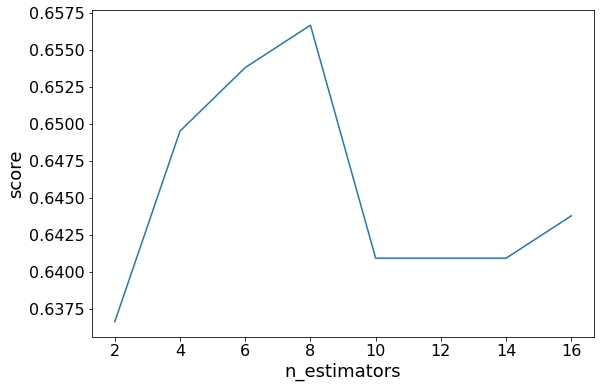

train_prediction score: 
 0.6566523605150214


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [ ]:
# evaluate bagging algorithm for classification
from sklearn.ensemble import BaggingClassifier
estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []
for n_estimators in estimator_range:
    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(tr_vect, tr_class)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = dev_class, y_pred = clf.predict(dev_vect)))

import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

svm = LinearSVC(random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
clf = BaggingClassifier(n_estimators = 8, oob_score = True,random_state = 22)
clf.fit(tr_vect, tr_class)
print("train_prediction score: \n", clf.score(dev_vect,dev_class))